In [8]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import time
import os
from os.path import join
from scipy.stats import zscore
import pickle


import pymc3
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import time
import os
from scipy.stats import zscore
import pickle
%load_ext autoreload
%autoreload 2
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_df = pd.read_csv(open(join(PROCESSED,"fc.tsv")), sep="\t", index_col=0)
data_df["Stimuli_Sample"] = data_df["Stimuli"].astype(str) + "_" + data_df["Sample"].astype(str)
data_df

,Timepoint,Stimuli,Sample,Cell Size,Cell Circularity,Cell Aspect Ratio,Cell Tracker Intensity,PI Intensity,AnexinV Intensity,Stimuli_Sample
0_2G3,3,G,2,11750,113.2539,2.8375,21192.0999,2951.6684,10590.6212,G_2
1_2G3,3,G,2,61,512.9727,61.0000,17836.5246,2907.2951,8491.5246,G_2
2_2G3,3,G,2,12,2565.8500,12.0000,18353.1667,2925.5833,8690.5833,G_2
3_2G3,3,G,2,23,1351.6133,23.0000,19101.6087,2961.4783,8673.8261,G_2
4_2G3,3,G,2,2,10000.0000,2.0000,19001.0000,2935.5000,8735.5000,G_2
...,...,...,...,...,...,...,...,...,...,...
4592_4B46,46,B,4,216,9413.2491,1.0487,14314.2315,4481.2037,27472.5972,B_4
4593_4B46,46,B,4,370,4905.5990,3.0213,12515.4270,6447.3568,29679.3784,B_4
4594_4B46,46,B,4,157,8635.1936,1.4828,14121.9427,15047.1401,26821.1465,B_4
4595_4B46,46,B,4,19,10000.0000,1.2733,20725.6316,46356.0526,26550.7895,B_4


In [5]:
quantile_df.columns.values

array(['Timepoint', 'Stimuli', 'Sample', 'Cell Size', 'Cell Circularity',
       'Cell Aspect Ratio', 'Cell Tracker Intensity', 'PI Intensity',
       'AnexinV Intensity', 'Stimuli_Sample', 'is_quantile'], dtype=object)

In [3]:
quantile_df = pickle.load(open(join(PROCESSED,"data_quantNorm_75.0.p"),"rb"))
quantile_df["Stimuli_Sample"] = quantile_df["Stimuli"].astype(str) + "_" + quantile_df["Sample"].astype(str)

quantile_df

,Timepoint,Stimuli,Sample,Cell Size,Cell Circularity,Cell Aspect Ratio,Cell Tracker Intensity,PI Intensity,AnexinV Intensity,Stimuli_Sample
0_2G3,3,G,2,35.285285,0.011411,1.258566,1.032698,0.467184,0.853761,G_2
1_2G3,3,G,2,0.183183,0.051684,27.056397,0.869179,0.460161,0.684543,G_2
2_2G3,3,G,2,0.036036,0.258518,5.322570,0.894355,0.463055,0.700590,G_2
3_2G3,3,G,2,0.069069,0.136180,10.201592,0.930827,0.468737,0.699239,G_2
4_2G3,3,G,2,0.006006,1.007535,0.887095,0.925925,0.464625,0.704211,G_2
...,...,...,...,...,...,...,...,...,...,...
4592_4B46,46,B,4,1.430464,0.944452,0.865979,0.437843,0.284648,0.928284,B_4
4593_4B46,46,B,4,2.450331,0.492189,2.494880,0.382821,0.409539,1.002850,B_4
4594_4B46,46,B,4,1.039735,0.866388,1.224443,0.431961,0.955802,0.906272,B_4
4595_4B46,46,B,4,0.125828,1.003322,1.051445,0.633954,2.944559,0.897136,B_4


## Violin plots

In [13]:
FEATURES = ['Cell Size', 'Cell Circularity','Cell Aspect Ratio', 'Cell Tracker Intensity', 'PI Intensity', 'AnexinV Intensity']


In [4]:
quantile_df["is_quantile"] = True
data_df["is_quantile"] = False
pd.concat((quantile_df,data_df ), axis=0)

,Timepoint,Stimuli,Sample,Cell Size,Cell Circularity,Cell Aspect Ratio,Cell Tracker Intensity,PI Intensity,AnexinV Intensity,Stimuli_Sample,is_quantile
0_2G3,3,G,2,35.285285,0.011411,1.258566,1.032698,0.467184,0.853761,G_2,True
1_2G3,3,G,2,0.183183,0.051684,27.056397,0.869179,0.460161,0.684543,G_2,True
2_2G3,3,G,2,0.036036,0.258518,5.322570,0.894355,0.463055,0.700590,G_2,True
3_2G3,3,G,2,0.069069,0.136180,10.201592,0.930827,0.468737,0.699239,G_2,True
4_2G3,3,G,2,0.006006,1.007535,0.887095,0.925925,0.464625,0.704211,G_2,True
...,...,...,...,...,...,...,...,...,...,...,...
4592_4B46,46,B,4,216.000000,9413.249100,1.048700,14314.231500,4481.203700,27472.597200,B_4,False
4593_4B46,46,B,4,370.000000,4905.599000,3.021300,12515.427000,6447.356800,29679.378400,B_4,False
4594_4B46,46,B,4,157.000000,8635.193600,1.482800,14121.942700,15047.140100,26821.146500,B_4,False
4595_4B46,46,B,4,19.000000,10000.000000,1.273300,20725.631600,46356.052600,26550.789500,B_4,False


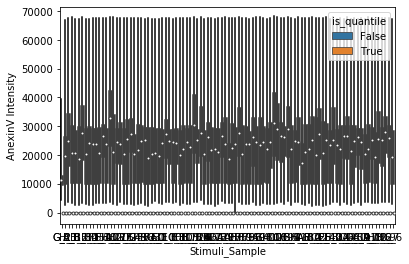

In [16]:
sns.violinplot(data=pd.concat((quantile_df,data_df ), axis=0), 
               x = "Stimuli_Sample", 
               y=FEATURES[-1],
               hue="is_quantile")

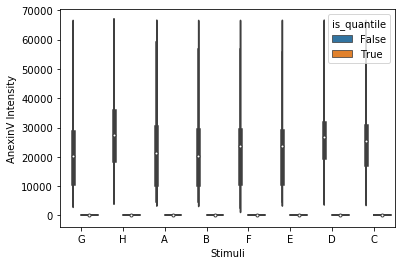

In [18]:
sns.violinplot(data=pd.concat((quantile_df,data_df ), axis=0), 
               x = "Stimuli", row = "Sample" ,
               y=FEATURES[-1],
               hue="is_quantile")

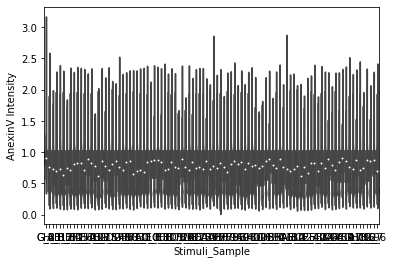

In [21]:
sns.violinplot(data=quantile_df, 
               x = "Stimuli_Sample", 
               y=FEATURES[-1])

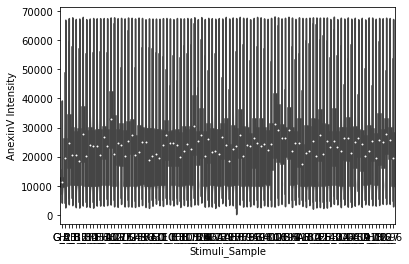

In [22]:
sns.violinplot(data=data_df, 
               x = "Stimuli_Sample", 
               y=FEATURES[-1])